In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("startup_funding.csv")
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
df.set_index("Sr No")

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
Sr No,,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...
3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN


In [ ]:
df.drop(columns=["Remarks"],inplace=True)

In [ ]:
df.rename(columns={"Date dd/mm/yyyy":"date","Startup Name":"startup",
                   "Industry Vertical":"vertical",
                   "SubVertical":"subvertical",
                  "City  Location":"city",
                   "Investors Name":"investors",
                   "InvestmentnType":"round",
                   "Amount in USD":"amount"},inplace=True)

In [ ]:
df

,Sr No,date,startup,vertical,subvertical,city,investors,round,amount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [ ]:
df["amount"]=df["amount"].fillna("0")

In [ ]:
df["amount"].astype("int")

ValueError: invalid literal for int() with base 10: '20,00,00,000'

In [ ]:
df["amount"]=df["amount"].str.replace(","," ")

In [ ]:
df["amount"]=df["amount"].str.replace(" ","")
df["amount"]

,amount
0,200000000
1,8048394
2,18358860
3,3000000
4,1800000
...,...
3039,4500000
3040,825000
3041,1500000
3042,0


In [ ]:
df["amount"].astype("int")

ValueError: invalid literal for int() with base 10: 'undisclosed'

In [ ]:
df["amount"]=df["amount"].str.replace("undisclosed","0")
df["amount"]

,amount
0,200000000
1,8048394
2,18358860
3,3000000
4,1800000
...,...
3039,4500000
3040,825000
3041,1500000
3042,0


In [ ]:
df["amount"].astype("int")

ValueError: invalid literal for int() with base 10: 'unknown'

In [ ]:
df["amount"]=df["amount"].str.replace("unknown","0")
df["amount"]

,amount
0,200000000
1,8048394
2,18358860
3,3000000
4,1800000
...,...
3039,4500000
3040,825000
3041,1500000
3042,0


In [ ]:
df["amount"].astype("int")

ValueError: invalid literal for int() with base 10: 'Undisclosed'

In [ ]:
df["amount"]=df["amount"].str.replace("Undisclosed","0")
df["amount"]

,amount
0,200000000
1,8048394
2,18358860
3,3000000
4,1800000
...,...
3039,4500000
3040,825000
3041,1500000
3042,0


In [ ]:
df["amount"].astype("int")

ValueError: invalid literal for int() with base 10: '4889975.54'

In [ ]:
df=df[df["amount"].str.isdigit()]

In [ ]:
df["amount"]=df["amount"].astype("float")

/tmp/ipython-input-20-347941321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["amount"]=df["amount"].astype("float")


In [ ]:
df["amount"].dtype

dtype('float64')

In [ ]:
df["amount"]=df["amount"].astype("int64")

/tmp/ipython-input-22-3927780617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["amount"]=df["amount"].astype("int64")


In [ ]:
df["amount"].dtype

dtype('int64')

In [ ]:
df

,Sr No,date,startup,vertical,subvertical,city,investors,round,amount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000
...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0


In [ ]:
df["amount"]=df["amount"].astype("float")

/tmp/ipython-input-25-347941321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["amount"]=df["amount"].astype("float")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sr No        3029 non-null   int64  
 1   date         3029 non-null   object 
 2   startup      3029 non-null   object 
 3   vertical     2858 non-null   object 
 4   subvertical  2104 non-null   object 
 5   city         2849 non-null   object 
 6   investors    3005 non-null   object 
 7   round        3027 non-null   object 
 8   amount       3029 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 236.6+ KB


In [ ]:
def to_inr(dollar):
  inr=dollar*82.5
  return inr/10000000
df["amount"]=df["amount"].apply(to_inr)

/tmp/ipython-input-27-2150023597.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["amount"]=df["amount"].apply(to_inr)


In [ ]:
df.head(5)

,Sr No,date,startup,vertical,subvertical,city,investors,round,amount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [ ]:
df["date"]=pd.to_datetime(df["date"],dayfirst=True,errors="coerce")

/tmp/ipython-input-29-3283202490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"]=pd.to_datetime(df["date"],dayfirst=True,errors="coerce")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sr No        3029 non-null   int64         
 1   date         3022 non-null   datetime64[ns]
 2   startup      3029 non-null   object        
 3   vertical     2858 non-null   object        
 4   subvertical  2104 non-null   object        
 5   city         2849 non-null   object        
 6   investors    3005 non-null   object        
 7   round        3027 non-null   object        
 8   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 236.6+ KB


In [ ]:
df.columns

Index(['Sr No', 'date', 'startup', 'vertical', 'subvertical', 'city',
       'investors', 'round', 'amount'],
      dtype='object')

In [ ]:
df.dropna(subset=['date', 'startup', 'vertical', 'city',
       'investors', 'round', 'amount'],inplace=True)

/tmp/ipython-input-32-247118277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['date', 'startup', 'vertical', 'city',


In [ ]:

df.tail(5)

,Sr No,date,startup,vertical,subvertical,city,investors,round,amount
2868,2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875
2869,2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000
2870,2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300
2871,2872,2015-04-29,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,4.125
2872,2873,2015-04-29,Travel Triangle,Online Travel Marketplace,NaN,Noida,"Bessemer Venture Partners, SAIF Partners",Private Equity,66.000


In [ ]:
df.to_csv("startup_funding_cleaned.csv",index=False)

In [ ]:
sorted(set(df["investors"].str.split(",").sum())) # hear the error is occur unhashble to see

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [ ]:
df.columns

Index(['Sr No', 'date', 'startup', 'vertical', 'subvertical', 'city',
       'investors', 'round', 'amount'],
      dtype='object')

In [ ]:
df[df['investors'].str.contains(' IDG Venture')].head()[['date', 'startup', 'vertical', 'city',
        'round', 'amount']]

,date,startup,vertical,city,round,amount
101,2019-04-13,Tripoto,Social Media,New Delhi,Series B,29.628844
252,2018-06-26,Sigtuple,Healthcare,Bengaluru,Private Equity,156.750000
258,2018-05-02,Bizongo,Consumer Internet,Mumbai,Private Equity,181.500000
309,2018-04-26,POPxo,Technology,Delhi,Private Equity,45.375000
504,2017-11-21,Heckyl,Technology,Mumbai,Private Equity,22.275000


<Axes: ylabel='amount'>

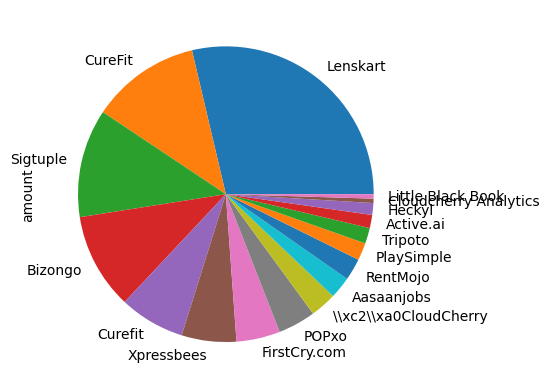

In [ ]:
df[df["investors"].str.contains(" IDG Venture")].groupby("startup")["amount"].sum().sort_values(ascending=False).plot(kind="pie")

<Axes: ylabel='amount'>

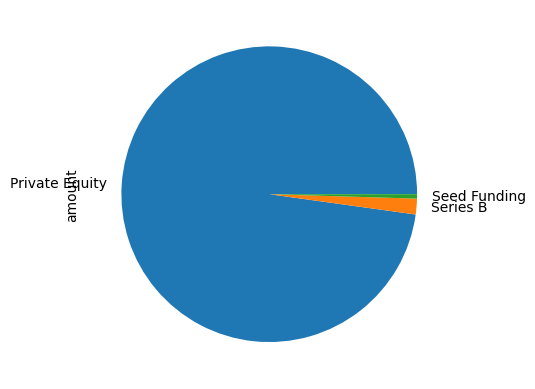

In [ ]:
df[df["investors"].str.contains(" IDG Venture")].groupby("round")["amount"].sum().sort_values(ascending=False).plot(kind="pie")

<Axes: ylabel='amount'>

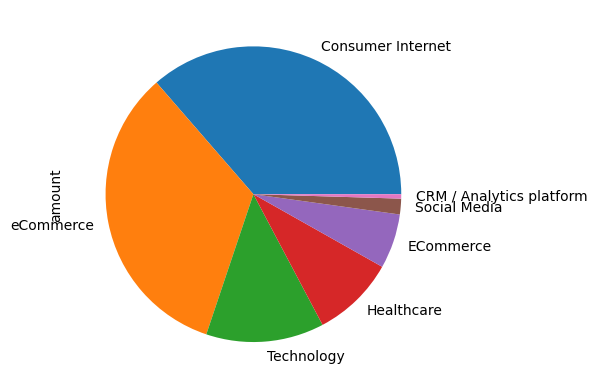

In [ ]:
df[df["investors"].str.contains(" IDG Venture")].groupby("vertical")["amount"].sum().sort_values(ascending=False).plot(kind="pie")

In [ ]:
df["year"]=df["date"].dt.year

/tmp/ipython-input-44-1666850892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"]=df["date"].dt.year


<Axes: ylabel='amount'>

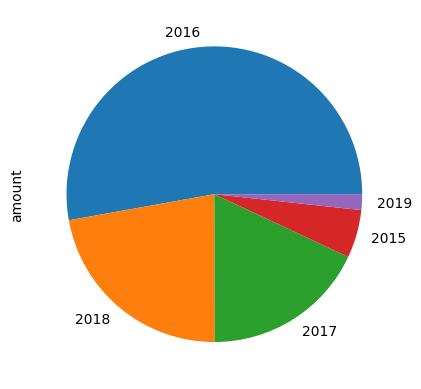

In [ ]:
df[df["investors"].str.contains(" IDG Venture")].groupby("year")["amount"].sum().sort_values(ascending=False).plot(kind="pie")

In [ ]:
df.columns

Index(['Sr No', 'date', 'startup', 'vertical', 'subvertical', 'city',
       'investors', 'round', 'amount', 'year'],
      dtype='object')

In [ ]:
df.columns


Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [ ]:
df.head()

,Sr No,date,startup,vertical,subvertical,city,investors,round,amount
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
